Loading cached data from 0_science.json


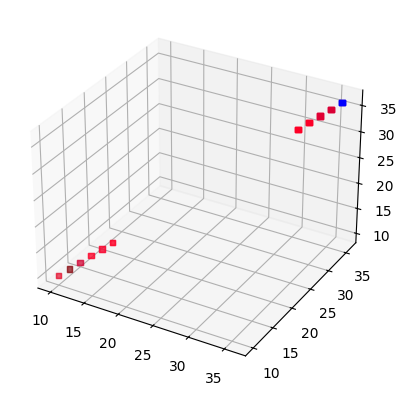

In [ ]:
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt  
import numpy as np
import importlib


from entries import *
import decoder
 
importlib.reload(decoder) # I hate you jupyter, this lost me an UNGODLY amount of time

# Sample data 
sessions = decoder.parse_all_sessions()
session_0 = sessions[0]
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
#rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
activations = decoder.extract_activations_for_stimulus_2(session_0, session_0.stimulus_data[0])
x = np.array([float(entry.x) for entry in activations])
y = np.array([float(entry.y) for entry in activations])
z = np.array([float(entry.z) for entry in activations])


min_hbo = min([entry.hbo for entry in activations])
max_hbo = max([entry.hbo for entry in activations])
min_hbr = min([entry.hbr for entry in activations])
max_hbr = max([entry.hbr for entry in activations])

def entry_to_color(entry):
    # Simple color mapping: positive HBO -> red, negative HBO -> blue
    normalized_hbo = (entry.hbo - min_hbo) / (max_hbo - min_hbo)
    normalized_hbr = (entry.hbr - min_hbr) / (max_hbr - min_hbr)
    return [normalized_hbo, 0, normalized_hbr]

color_mapping = np.array([entry_to_color(entry) for entry in activations])
    
surf = ax.scatter(x, y, z, c=color_mapping, s=15, marker="s")

plt.show()

In [ ]:

ax = fig.add_subplot(111, projection='3d')